# Advance ML Telecome Churn Case Study Assignment

#### Importing the required libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("telecom_churn_data.csv")

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.shape

(99999, 226)

### Data Preparation

In [5]:
# Checking for duplicate rows in the dataset
data[data.duplicated() == True]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


#### Handling missing Values

In [6]:
missing_val=((data.isnull().sum()/data.shape[0]) * 100).sort_values(ascending=False)
missing_val

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

Checking number of columns having missing values greater than 70 percent

In [7]:
len(missing_val[missing_val > 70])

40

In [8]:
missing_val_df=pd.DataFrame(missing_val)
missing_val_df=missing_val_df.reset_index()
missing_val_df.columns=['column', 'missing_val_per']

drop_columns=missing_val_df[missing_val_df.missing_val_per >= 70]['column']

In [9]:
drop_columns

0                    arpu_3g_6
1             night_pck_user_6
2            total_rech_data_6
3                    arpu_2g_6
4              max_rech_data_6
5                    fb_user_6
6           av_rech_amt_data_6
7     date_of_last_rech_data_6
8              count_rech_2g_6
9              count_rech_3g_6
10    date_of_last_rech_data_7
11           total_rech_data_7
12                   fb_user_7
13             max_rech_data_7
14            night_pck_user_7
15             count_rech_2g_7
16          av_rech_amt_data_7
17                   arpu_2g_7
18             count_rech_3g_7
19                   arpu_3g_7
20           total_rech_data_9
21             count_rech_3g_9
22                   fb_user_9
23             max_rech_data_9
24                   arpu_3g_9
25    date_of_last_rech_data_9
26            night_pck_user_9
27                   arpu_2g_9
28             count_rech_2g_9
29          av_rech_amt_data_9
30           total_rech_data_8
31                   arpu_3g_8
32      

Remove columns with missing values greater than 70 percent

In [10]:
data.drop(columns=drop_columns, axis=1, inplace=True)

Dropping unique valued columns mobile_number and circle_id

In [11]:
data.drop(columns=['mobile_number', 'circle_id'], axis=1, inplace=True)

In [12]:
data.shape

(99999, 184)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 184 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(143), int64(33), object(8)
memory usage: 140.4+ MB


In [14]:
date_columns=data.loc[:, data.dtypes == 'object'].columns
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [15]:
numerical_columns=data.loc[:, data.dtypes == 'int64'].columns
numerical_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

In [16]:
numerical_columns_2=data.loc[:, data.dtypes == 'float64'].columns
numerical_columns_2

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=143)

Imputing missing values of Last date of month with same date as most occuring date taking mode

In [17]:
data.last_date_of_month_6=data.last_date_of_month_6.fillna(data.last_date_of_month_6.mode)
data.last_date_of_month_7=data.last_date_of_month_7.fillna(data.last_date_of_month_7.mode)
data.last_date_of_month_8=data.last_date_of_month_8.fillna(data.last_date_of_month_8.mode)
data.last_date_of_month_9=data.last_date_of_month_9.fillna(data.last_date_of_month_9.mode)

In [18]:
missing_val2=((data.isnull().sum()/data.shape[0]) * 100).sort_values(ascending=False)
missing_val2=missing_val2[missing_val2 > 0]
missing_val2

loc_ic_t2f_mou_9       7.745077
roam_ic_mou_9          7.745077
std_ic_t2f_mou_9       7.745077
loc_og_t2t_mou_9       7.745077
spl_ic_mou_9           7.745077
                         ...   
date_of_last_rech_7    1.767018
date_of_last_rech_6    1.607016
loc_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
std_og_t2o_mou         1.018010
Length: 123, dtype: float64

In [19]:
data.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Imputing all missing values to 0 as most of the columns are numerical related to amount, call durations and data usage and blank values does make sense as no usage.

In [20]:
data.fillna(0, inplace=True)

In [21]:
data.isna().sum()

loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 184, dtype: int64

#### Deriving New Features

Add features for the average recharge amount in the first two months (the good phase) june(6) and july(7).
Average the revenue generated by the customer in first two months.

In [22]:
data['avg_amt_rech_6_7'] = (data.total_rech_amt_6 + data.total_rech_amt_7) / 2
data['avg_arpu_6_7'] = (data.arpu_6 + data.arpu_7) / 2

In [23]:
data.avg_amt_rech_6_7.describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: avg_amt_rech_6_7, dtype: float64

#### Filtering High-Value Customers
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [24]:
data.avg_amt_rech_6_7.quantile(0.7)

368.5

In [25]:
data=data[data.avg_amt_rech_6_7 > data.avg_amt_rech_6_7.quantile(0.7)]
data=data.reset_index()
data

,index,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_rech_6_7,avg_arpu_6_7
0,7,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1209.5150
1,8,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,435.4720
2,13,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,349.2585
3,16,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,365.4220
4,17,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,354.4940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29974,99970,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.269,410.614,...,0,0,0,1022,0.00,0.00,0.00,0.0,392.0,335.9415
29975,99974,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,414.303,321.093,...,0,0,0,3054,0.00,0.00,0.00,0.0,465.0,367.6980
29976,99986,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,644.973,455.228,...,0,0,0,2696,497.45,598.67,604.08,0.0,848.5,550.1005
29977,99988,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,312.558,512.932,...,0,0,0,328,104.73,0.00,0.00,0.0,467.0,412.7450


After filtering the High value customers from the dataset we see that we have approximately 30,000 customers whose churn prediction is more important from business perspective

#### Defining the Churn column

Deriving churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes used to tag churners are
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [26]:
data['usage_9']=data.total_ic_mou_9 + data.total_og_mou_9 + data.vol_2g_mb_9 + data.vol_3g_mb_9

In [27]:
data['churn']=data.usage_9.apply(lambda x: 0 if x > 0 else 1)

In [28]:
data.head()

,index,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_rech_6_7,avg_arpu_6_7,usage_9,churn
0,7,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,0,802,57.74,19.38,18.74,0.0,1185.0,1209.5150,0.00,1
1,8,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,...,0,315,21.03,910.65,122.16,0.0,519.0,435.4720,177.09,0
2,13,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,...,0,2607,0.00,0.00,0.00,0.0,380.0,349.2585,1077.95,0
3,16,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,...,0,511,0.00,2.45,21.89,0.0,459.0,365.4220,590.30,0
4,17,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,...,0,667,0.00,0.00,0.00,0.0,408.0,354.4940,718.21,0


Removing all the attributes corresponding to the churn phase (all attributes having ‘_9’, etc. in their names)


In [29]:
data.columns[data.columns.str.contains('_9')]

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', 'usage_9'],
      dtype='object')

In [30]:
data.shape

(29979, 189)

In [31]:
data.drop(columns=data.columns[data.columns.str.contains('_9')], axis=1, inplace=True)

In [32]:
data.shape

(29979, 144)

In [33]:
data.describe()

,index,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_rech_6_7,avg_arpu_6_7,churn
count,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,49997.650455,0.0,0.0,0.0,587.587624,589.424681,535.067748,296.23634,304.591922,267.809147,...,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,6.554528,697.014644,588.506152,0.08636
std,28982.720483,0.0,0.0,0.0,442.848876,463.049067,492.447887,460.94123,481.966821,466.750205,...,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,48.630605,488.925223,409.122349,0.28090
min,7.000000,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.00000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,-749.783000,0.00000
25%,24796.000000,0.0,0.0,0.0,364.352500,365.235000,289.782000,41.17000,41.045000,27.070000,...,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,381.684500,0.00000
50%,50011.000000,0.0,0.0,0.0,495.951000,493.781000,452.232000,125.89000,125.560000,99.590000,...,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,485.818000,0.00000
75%,75040.500000,0.0,0.0,0.0,704.184500,700.986000,671.349500,353.50000,360.360000,298.215000,...,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,674.779000,0.00000
max,99997.000000,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.71000,8157.780000,10752.560000,...,35.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,31438.461000,1.00000


Drop the columns which have same date value e.g., last_date_of_month_6, last_date_of_month_7, last_date_of_month_8

In [34]:
data.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis=1, inplace=True)

In [35]:
data.shape

(29979, 141)

Drop the columns with all zeros or 1 unique values as these doesn't present any useful information

In [36]:
data_col_cardinalities=pd.DataFrame(data.nunique())
data_col_cardinalities=data_col_cardinalities.reset_index()
data_col_cardinalities.columns=['col_name', 'unique_val']
columns_all_zeros=data_col_cardinalities[data_col_cardinalities['unique_val'] == 1]
columns_all_zeros

,col_name,unique_val
1,loc_og_t2o_mou,1
2,std_og_t2o_mou,1
3,loc_ic_t2o_mou,1
43,std_og_t2c_mou_6,1
44,std_og_t2c_mou_7,1
45,std_og_t2c_mou_8,1
82,std_ic_t2o_mou_6,1
83,std_ic_t2o_mou_7,1
84,std_ic_t2o_mou_8,1


In [37]:
data.drop(columns=columns_all_zeros['col_name'], axis=1, inplace=True)

In [38]:
data.shape

(29979, 132)

Dervie new columns from the date_of_last_rech date columns to present the information whether customer has done recharge or not.
Having the date means recharge was done so we will assign value to 1 and if field is blank or 0 then no recharge was done so will assign value to 0.

In [39]:
data['rech_6']=data.date_of_last_rech_6.apply(lambda x: 1 if x !=0 else 0).apply(int)
data['rech_7']=data.date_of_last_rech_7.apply(lambda x: 1 if x !=0 else 0).apply(int)
data['rech_8']=data.date_of_last_rech_8.apply(lambda x: 1 if x !=0 else 0).apply(int)

In [40]:
data.head()

,index,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_rech_6_7,avg_arpu_6_7,churn,rech_6,rech_7,rech_8
0,7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,57.74,19.38,18.74,0.0,1185.0,1209.5150,1,1,1,1
1,8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,21.03,910.65,122.16,0.0,519.0,435.4720,0,1,1,1
2,13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0.00,0.00,0.00,0.0,380.0,349.2585,0,1,1,1
3,16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0.00,2.45,21.89,0.0,459.0,365.4220,0,1,1,1
4,17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0.00,0.00,0.00,0.0,408.0,354.4940,0,1,1,1


Drop the date columns of last recharge as we already derived information from these.
Also drop the total_rech_amt_6,total_rech_amt_7 and arpu_6, apru_7 as the avegrage columns are already created. 

In [41]:
drop_columns=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'total_rech_amt_6', 
                'total_rech_amt_7', 'arpu_6', 'arpu_7']

data.drop(columns=drop_columns, axis=1, inplace=True)

In [42]:
data.shape

(29979, 128)

In [43]:
data.describe()

,index,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_rech_6_7,avg_arpu_6_7,churn,rech_6,rech_7,rech_8
count,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000
mean,49997.650455,535.067748,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,...,129.482436,135.225368,121.450911,6.554528,697.014644,588.506152,0.08636,0.997932,0.996197,0.980186
std,28982.720483,492.447887,460.94123,481.966821,466.750205,470.773248,486.710075,477.656991,79.192826,76.343222,...,390.625027,408.218570,389.910814,48.630605,488.925223,409.122349,0.28090,0.045430,0.061549,0.139363
min,7.000000,-945.808000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,369.000000,-749.783000,0.00000,0.000000,0.000000,0.000000
25%,24796.000000,289.782000,41.17000,41.045000,27.070000,137.340000,135.690000,95.730000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,450.000000,381.684500,0.00000,1.000000,1.000000,1.000000
50%,50011.000000,452.232000,125.89000,125.560000,99.590000,282.260000,282.040000,241.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,569.000000,485.818000,0.00000,1.000000,1.000000,1.000000
75%,75040.500000,671.349500,353.50000,360.360000,298.215000,523.625000,532.905000,483.000000,0.000000,0.000000,...,1.600000,2.025000,0.000000,0.000000,796.000000,674.779000,0.00000,1.000000,1.000000,1.000000
max,99997.000000,33543.624000,7376.71000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,2613.310000,3813.290000,...,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,31438.461000,1.00000,1.000000,1.000000,1.000000


In [44]:
data[data.columns[data.columns.str.contains('rech|amt')]]

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,avg_amt_rech_6_7,rech_6,rech_7,rech_8
0,5,5,7,3638,1580,790,1580,0,0,779,1185.0,1,1,1
1,19,21,14,120,90,154,30,50,0,10,519.0,1,1,1
2,6,4,11,717,110,110,130,110,50,0,380.0,1,1,1
3,10,6,2,160,110,110,130,100,100,130,459.0,1,1,1
4,19,2,4,30,110,0,30,30,0,0,408.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29974,11,19,13,337,90,67,67,30,50,30,392.0,1,1,1
29975,8,7,3,388,120,120,130,120,120,130,465.0,1,1,1
29976,6,8,3,25,550,786,25,550,786,0,848.5,1,1,1
29977,12,12,9,504,50,154,154,50,50,50,467.0,1,1,1


Take all the averages of good phase months and create corresponing columns with suffix "_avg_gp" which will be used to identify all good phase columns 

In [45]:
cols_6_and_7=data.columns[~data.columns.str.contains('_6_7')]
cols_6_and_7=cols_6_and_7[cols_6_and_7.str.contains('_6|_7')]
cols_6_and_7

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7',
       'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7',
       'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_mou_6', 'st

In [46]:
len(cols_6_and_7)

78

In [47]:
cols_6_and_7_identifiers=cols_6_and_7[cols_6_and_7.str.contains('_6')].str.replace('_6', '')
cols_6_and_7_identifiers

Index(['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb',
       'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'rech'],
      dtype='object')

In [48]:
for col in cols_6_and_7_identifiers:
    avg_col = col + '_avg_gp'
    col_6 = col + '_6'
    col_7 = col + '_7'
    data[avg_col] = (data[col_6] + data[col_7] ) / 2

In [49]:
data.shape

(29979, 167)

Drop all the individual "_6" and "_7" month columns as we have taken the average for all columns in respective _avg_gp columns

In [50]:
data.drop(columns=cols_6_and_7, axis=1, inplace=True)

In [51]:
data.shape

(29979, 89)

Checking correlation between amount, recharge related columns

In [118]:
cols = data.columns[data.columns.str.contains('amt|rech')]
cols

Index(['total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'avg_amt_rech_6_7', 'rech_8',
       'total_rech_num_avg_gp', 'max_rech_amt_avg_gp',
       'last_day_rch_amt_avg_gp', 'rech_avg_gp'],
      dtype='object')

In [119]:
data[cols]

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,avg_amt_rech_6_7,rech_8,total_rech_num_avg_gp,max_rech_amt_avg_gp,last_day_rch_amt_avg_gp,rech_avg_gp
0,7,3638,1580,779,1185.0,1,5.0,1185.0,0.0,1.0
1,14,120,30,10,519.0,1,20.0,122.0,25.0,1.0
2,11,717,130,0,380.0,1,5.0,110.0,80.0,1.0
3,2,160,130,130,459.0,1,8.0,110.0,100.0,1.0
4,4,30,30,0,408.0,1,10.5,55.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
29974,13,337,67,30,392.0,1,15.0,78.5,40.0,1.0
29975,3,388,130,130,465.0,1,7.5,120.0,120.0,1.0
29976,3,25,25,0,848.5,1,7.0,668.0,668.0,1.0
29977,9,504,154,50,467.0,1,12.0,102.0,50.0,1.0


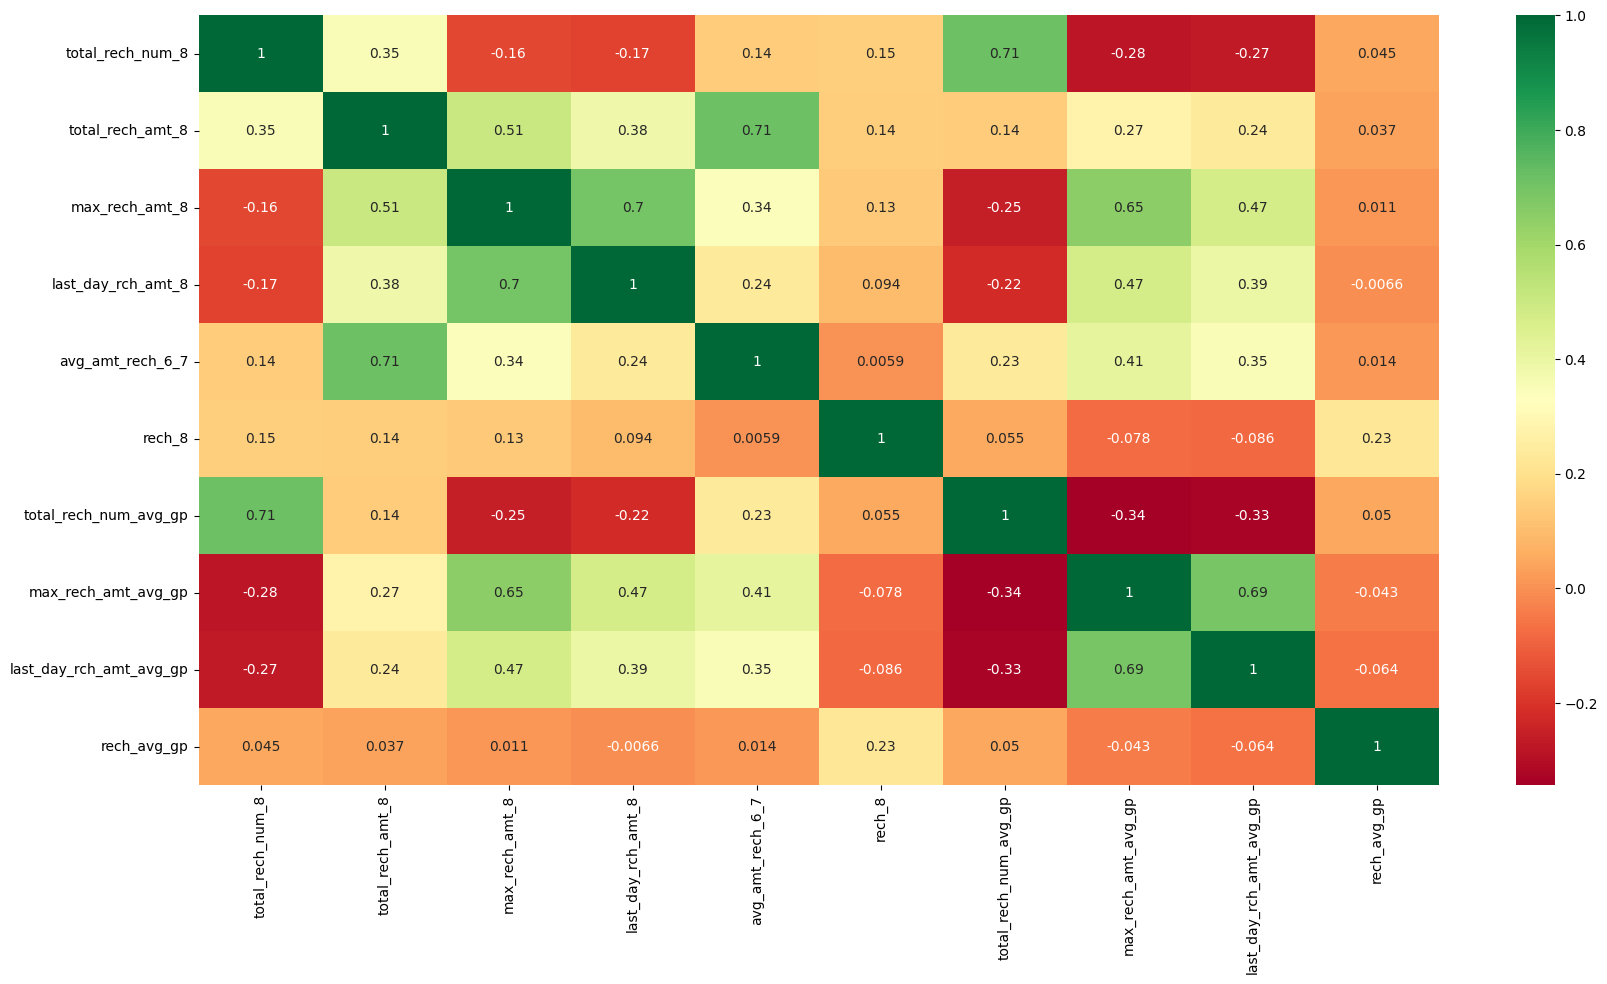

In [121]:
plt.figure(figsize = (20,10))
sns.heatmap(data[cols].corr(), annot = True, cmap='RdYlGn')
plt.show()

### 1. Model Building to Predict the Cuctomers who might Churn

#### Scaling the data

In [52]:
scaler = StandardScaler()

In [53]:
X = data.copy()

Remove the target column churn as that will not be required in PCA

In [54]:
X.drop('churn', axis=1, inplace=True)

In [55]:
X = scaler.fit_transform(X)

In [56]:
X[:5,:5]

array([[-1.72487204,  5.35377711, -0.46175179, -0.10310903,  0.24638288],
       [-1.72483754, -0.80762329, -0.49862437, -0.4996973 , -0.17782052],
       [-1.72466502,  0.11817133,  0.57083059,  0.22464209,  0.78897174],
       [-1.72456151, -0.70500767, -0.42250102, -0.44467782, -0.17782052],
       [-1.724527  , -1.03478411, -0.55709345, -0.77383164, -0.11333195]])

#### Applying PCA on the data

In [57]:
pca = PCA(random_state=42)

In [58]:
pca.fit(X)

PCA(random_state=42)

In [59]:
pca.components_

array([[ 8.79621673e-04,  2.12031948e-01,  8.48835425e-02, ...,
         5.28558588e-02, -1.61514735e-03,  1.18624236e-02],
       [ 1.24705425e-03,  1.21278938e-01,  2.08355963e-01, ...,
        -8.14831505e-02, -1.27527695e-02, -2.77124855e-03],
       [ 4.39830127e-03,  1.79551549e-01, -3.81201010e-02, ...,
         2.52023701e-01,  6.56430024e-02, -2.87139683e-04],
       ...,
       [-1.62281482e-08,  1.11774868e-06, -2.19791274e-06, ...,
         2.85359042e-07,  1.24637685e-07, -1.39699510e-07],
       [-5.53864162e-08,  2.07801734e-07,  2.21879333e-06, ...,
        -6.35673865e-08, -6.56320232e-08,  2.90334559e-08],
       [-1.13505996e-08, -1.55326966e-07,  3.17230861e-06, ...,
        -2.88808413e-08,  5.69662726e-08,  8.29443770e-09]])

In [60]:
pca.explained_variance_ratio_

array([1.03112883e-01, 9.04476123e-02, 6.28932136e-02, 4.82484112e-02,
       4.16952031e-02, 3.78439481e-02, 3.20030934e-02, 2.87442033e-02,
       2.77908102e-02, 2.65961115e-02, 2.53462373e-02, 2.35542991e-02,
       2.28059961e-02, 2.18967944e-02, 2.06412442e-02, 1.95696427e-02,
       1.79500211e-02, 1.72755751e-02, 1.61176254e-02, 1.46844602e-02,
       1.42701014e-02, 1.38499054e-02, 1.35008052e-02, 1.27883032e-02,
       1.19003821e-02, 1.18331604e-02, 1.13602028e-02, 1.09287779e-02,
       1.02186530e-02, 9.83696499e-03, 9.56403828e-03, 9.22479475e-03,
       9.14472425e-03, 8.52969519e-03, 8.21024485e-03, 8.16838410e-03,
       7.70938991e-03, 7.33786663e-03, 7.06222229e-03, 6.78053947e-03,
       6.26825992e-03, 6.02637389e-03, 5.52382933e-03, 5.41941131e-03,
       5.34962105e-03, 5.10003275e-03, 4.66106388e-03, 3.98341038e-03,
       3.72658661e-03, 3.63818487e-03, 3.55851131e-03, 3.54357435e-03,
       3.41746676e-03, 3.22309953e-03, 3.08123387e-03, 2.95258249e-03,
      

<BarContainer object of 88 artists>

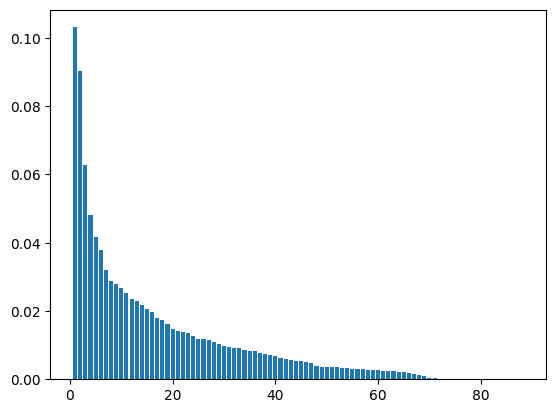

In [61]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [62]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#### Making the scree plot

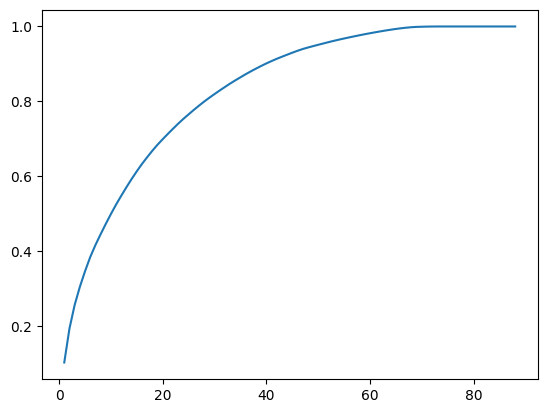

In [63]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

PCA with 60 components to build a model on top this

In [64]:
pc2 = PCA(n_components=60, random_state=42)

In [65]:
data_pca = pc2.fit_transform(X)

In [66]:
data_pca.shape

(29979, 60)

Making a dataframe out of it for convenience



In [67]:
df = pd.DataFrame(data_pca)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,6.630995,-1.155195,4.843359,1.169864,5.880521,-1.977818,1.725074,-2.207857,2.878648,-1.477147,...,1.236205,-0.270110,0.056859,-0.400560,-0.676001,0.362149,0.493087,0.212386,-0.147949,0.411615
1,-2.715363,-0.505089,0.109032,-0.592118,-1.390279,0.286473,0.306962,0.560403,0.667696,0.640571,...,-0.983604,0.078082,0.096968,0.186215,-0.136011,0.350386,-0.035559,0.379486,-0.437545,0.380189
2,1.403725,0.452447,-1.102068,5.236180,0.003703,-0.964131,1.441344,0.183017,-0.096190,1.327444,...,-0.325347,-0.158038,0.653187,-0.292060,-0.362389,1.011532,2.214059,-0.310417,0.258223,-0.231645
3,-1.229478,-1.516867,-1.062813,0.902915,0.753676,-0.348348,-0.075545,0.138225,-0.237547,0.670667,...,-0.113246,0.103177,-0.118157,-0.456348,0.451711,-0.079989,0.045287,0.029358,-0.083373,-0.310074
4,-3.793420,-0.030917,-0.694312,-0.255263,0.038310,-0.938249,0.269605,-0.183722,-0.533213,0.539094,...,-0.074466,-0.016121,0.097400,0.050829,-0.058123,-0.111363,0.003743,0.014384,0.169615,-0.023520


We have filtered the dataset to have only top 60 features identified after doing Principal Component Analysis (PCA) on which we will build model to predict the churn

Let's check how the target varaible's distribution looks like in the original dataset

In [68]:
data.churn.value_counts(normalize=True)

0    0.91364
1    0.08636
Name: churn, dtype: float64

We see that Churn column is highly imbalance and roughly ~8 % of data shows churn and predicting this would be 

#### Train Test Split

In [69]:
#Create Train and Test Datasets
y = data.churn
#X = data.drop('churn', axis=1)
X = data_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [70]:
X_train.shape

(20985, 60)

In [71]:
y_train.value_counts(normalize = True)

0    0.913653
1    0.086347
Name: churn, dtype: float64

In [72]:
y_test.value_counts(normalize = True)

0    0.913609
1    0.086391
Name: churn, dtype: float64

This is a case of Accuracy paradox as even if we don't build a model then also your accuracy would be really high as we have 92% of cases where churn is not identified.

Let's build LogisticRegression Model and see confusion matrix, precision and recall evaluation metric for this dataset

In [73]:
from collections import Counter
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [74]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = lreg.predict(X_test)

In [76]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.92895263509006
F1 score:  0.41429880843263056
Recall:  0.2908622908622909
Precision:  0.7197452229299363

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8217
           1       0.72      0.29      0.41       777

    accuracy                           0.93      8994
   macro avg       0.83      0.64      0.69      8994
weighted avg       0.92      0.93      0.91      8994


 confussion matrix:
 [[8129   88]
 [ 551  226]]


#### Handling Data Imbalance Using Sampling techniques

In [77]:
y = data.churn
#X = data.drop('churn', axis=1)
X = data_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

Let's use Ramdom Under sampling on the train dataset

In [78]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3624

In [79]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1812), (1, 1812)]


In [80]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

LogisticRegression()

In [81]:
y_pred_train_us = lreg_us.predict(X_train)

In [82]:
print ('Accuracy: ', accuracy_score(y_train, y_pred_train_us))
print ('F1 score: ', f1_score(y_train, y_pred_train_us))
print ('Recall: ', recall_score(y_train, y_pred_train_us))
print ('Precision: ', precision_score(y_train, y_pred_train_us))
print ('\n clasification report:\n', classification_report(y_train, y_pred_train_us))
print ('\n confussion matrix:\n',confusion_matrix(y_train, y_pred_train_us))

Accuracy:  0.8097688825351441
F1 score:  0.4353606789250354
Recall:  0.8493377483443708
Precision:  0.2926968429060479

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     19173
           1       0.29      0.85      0.44      1812

    accuracy                           0.81     20985
   macro avg       0.64      0.83      0.66     20985
weighted avg       0.92      0.81      0.85     20985


 confussion matrix:
 [[15454  3719]
 [  273  1539]]


In [84]:
from sklearn.metrics import RocCurveDisplay

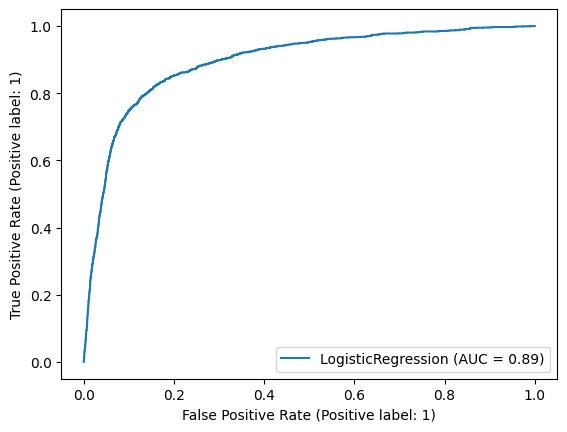

In [85]:
RocCurveDisplay.from_estimator(lreg_us, X_train, y_train)
plt.show()

#### Making Predictions on Test Dataset

In [86]:
y_pred_us = lreg_us.predict(X_test)

In [87]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.8098732488325551
F1 score:  0.4333996023856859
Recall:  0.8416988416988417
Precision:  0.2918340026773762

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8217
           1       0.29      0.84      0.43       777

    accuracy                           0.81      8994
   macro avg       0.64      0.82      0.66      8994
weighted avg       0.92      0.81      0.85      8994


 confussion matrix:
 [[6630 1587]
 [ 123  654]]


We see a good imporovemnet in the Recall metric which now shows 84 % for the churned cases and this is what we should be focusing as this is minority class problem where there identifyin positive cases are more important

#### Model Evaluation

In [88]:
print ('Recall: ', recall_score(y_test, y_pred_us))

Recall:  0.8416988416988417


Ploting the ROC curve

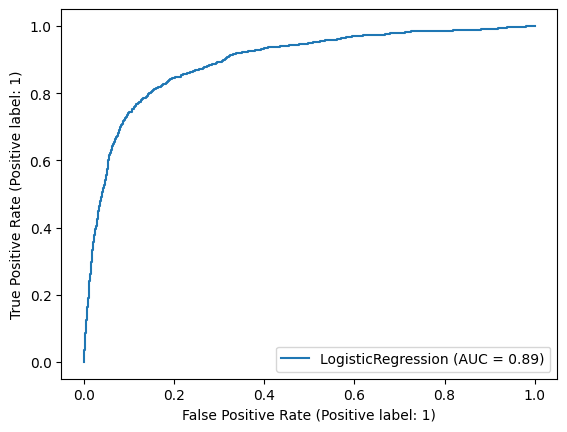

In [89]:
RocCurveDisplay.from_estimator(lreg_us, X_test, y_test)
plt.show()

### 2. Model for identifying important predictor attributes which help the business understand indicators of churn 

#### Using Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

We will create model using Random forest model on the Original Data to identify the important attributes which will help business make decisions on to reduce the churn. We will use feature importance for this

In [91]:
y = data.churn
X = data.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [92]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [93]:
X_train.shape

(20985, 88)

In [94]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 438 ms
Wall time: 620 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [95]:
rf.oob_score_

0.9391946628544198

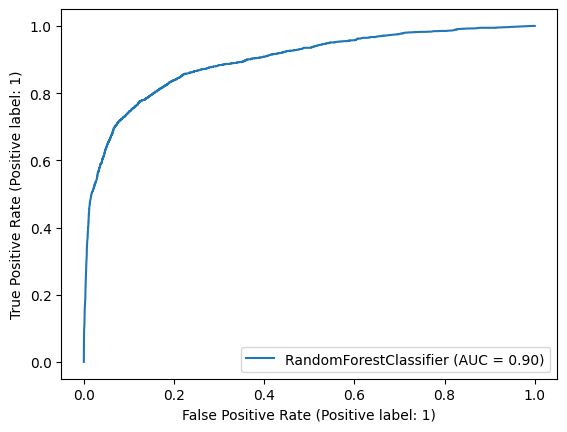

In [96]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [97]:
rf = RandomForestClassifier(random_state=42, n_jobs=12)

In [98]:
params = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [20, 50, 100],
    'n_estimators': [10, 25, 50]
}

In [99]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=12, verbose=1, scoring="accuracy")

In [100]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
CPU times: total: 2.44 s
Wall time: 1min 39s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=12, random_state=42),
             n_jobs=12,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [10, 25, 50]},
             scoring='accuracy', verbose=1)

In [101]:
grid_search.best_score_

0.940529039668366

In [102]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=10,
                       n_jobs=12, random_state=42)

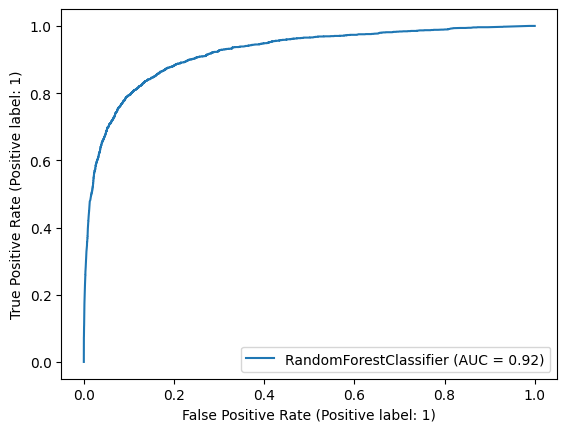

In [103]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [104]:
rf_best.feature_importances_

array([9.51202061e-06, 1.82951681e-02, 2.30371334e-03, 5.06287801e-03,
       1.30188473e-02, 1.20551991e-02, 4.98606195e-02, 8.19688264e-02,
       7.54318734e-05, 2.49374965e-04, 7.22973476e-02, 0.00000000e+00,
       0.00000000e+00, 4.00010696e-03, 2.25695338e-02, 1.03783126e-04,
       4.43188696e-04, 0.00000000e+00, 8.46577129e-02, 1.06473312e-01,
       9.94754549e-02, 6.82823925e-04, 9.59405580e-02, 2.94369348e-04,
       6.21144118e-03, 1.01554481e-03, 4.92276556e-02, 3.28039608e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.57835631e-03,
       5.30492261e-02, 6.89464302e-02, 1.94403099e-02, 1.48329440e-02,
       1.88913615e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.28397941e-03, 8.56406616e-03, 1.66626982e-04,
       5.13880470e-05, 2.53239700e-04, 1.04623578e-03, 1.49180327e-03,
       1.50746038e-03, 1.77373509e-03, 0.00000000e+00, 6.55725215e-04,
       3.98559216e-04, 8.09985466e-05, 3.66920439e-04, 1.86554110e-03,
      

In [105]:
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importance": rf_best.feature_importances_
})

In [106]:
imp_df.sort_values(by="Importance", ascending=False)

,Features,Importance
19,loc_ic_t2t_mou_8,0.106473
20,loc_ic_t2m_mou_8,0.099475
22,loc_ic_mou_8,0.095941
18,total_og_mou_8,0.084658
7,loc_og_t2m_mou_8,0.081969
...,...,...
75,spl_ic_mou_avg_gp,0.000000
39,monthly_3g_8,0.000000
40,sachet_3g_8,0.000000
50,offnet_mou_avg_gp,0.000000


In [113]:
imp_df=imp_df[imp_df.Importance >= 0.01].sort_values(by="Importance", ascending=False)
imp_df

,Features,Importance
19,loc_ic_t2t_mou_8,0.106473
20,loc_ic_t2m_mou_8,0.099475
22,loc_ic_mou_8,0.095941
18,total_og_mou_8,0.084658
7,loc_og_t2m_mou_8,0.081969
10,loc_og_mou_8,0.072297
33,max_rech_amt_8,0.068946
32,total_rech_amt_8,0.053049
6,loc_og_t2t_mou_8,0.049861
26,std_ic_mou_8,0.049228


In [114]:
len(imp_df_2)

18